In [1]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.




Basic Statistics:
               age        income  spending_score
count  1000.000000   1000.000000     1000.000000
mean     30.096660  51062.543559       50.116684
std       4.896080  14961.815658       19.669086
min      13.793663   5894.170480      -10.390243
25%      26.762048  40906.374665       37.040008
50%      30.126503  50946.156985       49.994985
75%      33.239719  60933.232655       63.218306
max      49.263657  97896.613518      128.524754

Outliers detected using IQR method:
Outliers in age: 8
Outliers in income: 8
Outliers in spending_score: 10

Outliers detected using Z-score method:
Outliers in age: 3
Outliers in income: 4
Outliers in spending_score: 5


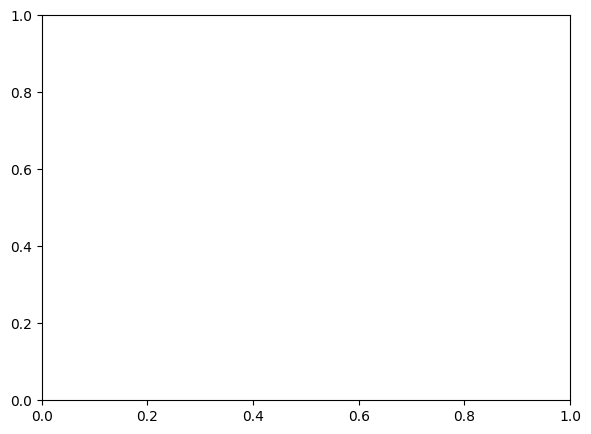

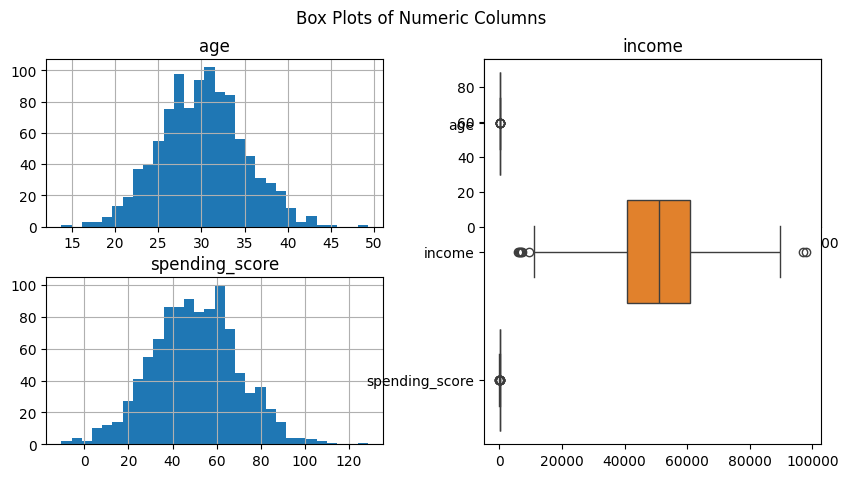

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
np.random.seed(42)
data = {
    'age': np.random.normal(30, 5, 1000), 
    'income': np.random.normal(50000, 15000, 1000),
    'spending_score': np.random.normal(50, 20, 1000)
}

df = pd.DataFrame(data)
print("Basic Statistics:")
print(df.describe())
def detect_outliers_iqr(df):
    outliers = {}
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers
outliers_iqr = detect_outliers_iqr(df)
print("\nOutliers detected using IQR method:")
for col, data in outliers_iqr.items():
    print(f"Outliers in {col}: {len(data)}")
def detect_outliers_zscore(df, threshold=3):
    outliers = {}
    for col in df.select_dtypes(include=np.number).columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers[col] = df[z_scores > threshold]
    return outliers
outliers_zscore = detect_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, data in outliers_zscore.items():
    print(f"Outliers in {col}: {len(data)}")
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
df.hist(bins=30, figsize=(10, 5))
plt.suptitle('Histograms of Numeric Columns')
plt.subplot(1, 2, 2)
sns.boxplot(data=df, orient="h")
plt.suptitle('Box Plots of Numeric Columns')

plt.show()